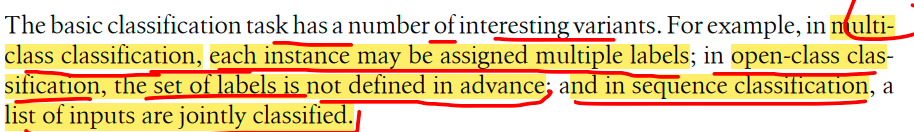

# NaiveBayes Gender Classifier

In [5]:
def gender_features(word):
    return {'last_letter': word[-1]}

gender_features('Shrek')

{'last_letter': 'k'}

In [6]:
import nltk 
nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


True

In [10]:
from nltk.corpus import names
import random
names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])


random.shuffle(names)


In [11]:
featuresets = [(gender_features(n), g) for (n,g) in names]
train_set, test_set = featuresets[500:], featuresets[:500]


classifier = nltk.NaiveBayesClassifier.train(train_set)


In [12]:
classifier.classify(gender_features('Neo'))


'male'

In [13]:
classifier.classify(gender_features('Trinity'))

'female'

In [15]:
print(nltk.classify.accuracy(classifier, test_set))

0.778


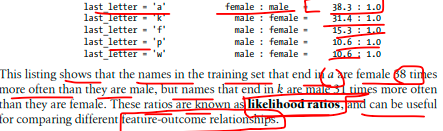

In [16]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     35.5 : 1.0
             last_letter = 'k'              male : female =     31.8 : 1.0
             last_letter = 'f'              male : female =     16.6 : 1.0
             last_letter = 'p'              male : female =     12.6 : 1.0
             last_letter = 'v'              male : female =     10.5 : 1.0


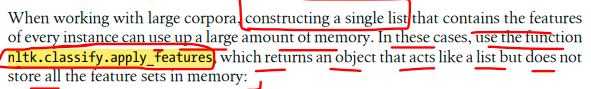

In [17]:
from nltk.classify import apply_features
train_set = apply_features(gender_features, names[500:])
test_set = apply_features(gender_features, names[:500])


# features2

In [19]:
def gender_features2(name):
    features = {}
    features["firstletter"] = name[0].lower()
    features["lastletter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        if (letter in name.lower()):
            features["count(%s)" % letter] = name.lower().count(letter)
            features["has(%s)" % letter] = True
        else:
            features["count(%s)" % letter] =0
            features["has(%s)" % letter] = True
    return features


gender_features2('John')

{'firstletter': 'j',
 'lastletter': 'n',
 'count(a)': 0,
 'has(a)': True,
 'count(b)': 0,
 'has(b)': True,
 'count(c)': 0,
 'has(c)': True,
 'count(d)': 0,
 'has(d)': True,
 'count(e)': 0,
 'has(e)': True,
 'count(f)': 0,
 'has(f)': True,
 'count(g)': 0,
 'has(g)': True,
 'count(h)': 1,
 'has(h)': True,
 'count(i)': 0,
 'has(i)': True,
 'count(j)': 1,
 'has(j)': True,
 'count(k)': 0,
 'has(k)': True,
 'count(l)': 0,
 'has(l)': True,
 'count(m)': 0,
 'has(m)': True,
 'count(n)': 1,
 'has(n)': True,
 'count(o)': 1,
 'has(o)': True,
 'count(p)': 0,
 'has(p)': True,
 'count(q)': 0,
 'has(q)': True,
 'count(r)': 0,
 'has(r)': True,
 'count(s)': 0,
 'has(s)': True,
 'count(t)': 0,
 'has(t)': True,
 'count(u)': 0,
 'has(u)': True,
 'count(v)': 0,
 'has(v)': True,
 'count(w)': 0,
 'has(w)': True,
 'count(x)': 0,
 'has(x)': True,
 'count(y)': 0,
 'has(y)': True,
 'count(z)': 0,
 'has(z)': True}

In [20]:
featuresets = [(gender_features2(n), g) for (n,g) in names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)


print(nltk.classify.accuracy(classifier, test_set))


0.8


# WITH DEV TEST

In [21]:
train_names = names[1500:]             # ------------------------------ DEVELOPMENT SET = 
devtest_names = names[500:1500]        # ------------------------------ Train + dev set
test_names = names[:500]


In [22]:
train_set = [(gender_features(n), g) for (n,g) in train_names]
devtest_set = [(gender_features(n), g) for (n,g) in devtest_names]
test_set = [(gender_features(n), g) for (n,g) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set) 

In [23]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )


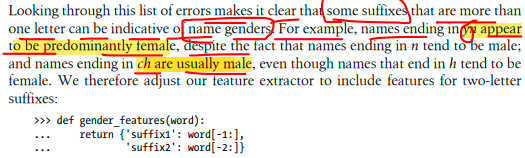

In [24]:
def gender_features(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:]}


train_set = [(gender_features(n), g) for (n,g) in train_names]
devtest_set = [(gender_features(n), g) for (n,g) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)





print(nltk.classify.accuracy(classifier, devtest_set))

0.785


# Document Classification

In [25]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
documents = [(list(movie_reviews.words(fileid)), category) for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [27]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words.keys())[:2000] 


def document_features(document): 
    document_words = set(document) 
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


print(document_features(movie_reviews.words('pos/cv957_8737.txt')) )

{'contains(plot)': True, 'contains(:)': True, 'contains(two)': True, 'contains(teen)': False, 'contains(couples)': False, 'contains(go)': False, 'contains(to)': True, 'contains(a)': True, 'contains(church)': False, 'contains(party)': False, 'contains(,)': True, 'contains(drink)': False, 'contains(and)': True, 'contains(then)': True, 'contains(drive)': False, 'contains(.)': True, 'contains(they)': True, 'contains(get)': True, 'contains(into)': True, 'contains(an)': True, 'contains(accident)': False, 'contains(one)': True, 'contains(of)': True, 'contains(the)': True, 'contains(guys)': False, 'contains(dies)': False, 'contains(but)': True, 'contains(his)': True, 'contains(girlfriend)': True, 'contains(continues)': False, 'contains(see)': False, 'contains(him)': True, 'contains(in)': True, 'contains(her)': False, 'contains(life)': False, 'contains(has)': True, 'contains(nightmares)': False, 'contains(what)': True, "contains(')": True, 'contains(s)': True, 'contains(deal)': False, 'contains

In [28]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)


In [29]:
print(nltk.classify.accuracy(classifier, test_set) )

0.79


In [30]:
classifier.show_most_informative_features(5) 

Most Informative Features
 contains(unimaginative) = True              neg : pos    =      8.5 : 1.0
    contains(schumacher) = True              neg : pos    =      6.7 : 1.0
          contains(mena) = True              neg : pos    =      6.4 : 1.0
        contains(shoddy) = True              neg : pos    =      6.4 : 1.0
        contains(suvari) = True              neg : pos    =      6.4 : 1.0


In [2]:
import nltk
gen_summ = [[w.lower() for w in nltk.word_tokenize(text)] for text in ["ram was fighting","where did john eat","eat to be fit"]]

bigram_finder_inc_summ = nltk.collocations.BigramCollocationFinder.from_documents(gen_summ)

In [32]:
bigram_finder_inc_summ.ngram_fd.items()

dict_items([(('ram', 'was'), 1), (('was', 'fighting'), 1), (('where', 'did'), 1), (('did', 'john'), 1), (('john', 'eat'), 1), (('eat', 'to'), 1), (('to', 'be'), 1), (('be', 'fit'), 1)])

# POS TAG  CLASSIFICATION

In [4]:
import nltk
from nltk.corpus import brown

# Initialize the frequency distribution
suffix_fdist = nltk.FreqDist()

# Iterate over words in the Brown corpus
for word in brown.words():
    word = word.lower()
    suffix_fdist.update([word[-1:]])
    suffix_fdist.update([word[-2:]])
    suffix_fdist.update([word[-3:]])

# Now you can use suffix_fdist to access the frequency distribution
print(suffix_fdist.most_common(10))  # Print the 10 most common suffixes


[('e', 202946), (',', 175002), ('.', 152999), ('s', 128722), ('d', 105687), ('t', 94459), ('he', 92084), ('n', 87889), ('a', 74912), ('of', 72978)]


In [8]:
common_suffixes = list(suffix_fdist.keys())[:100]
common_suffixes[:5]

['e', 'he', 'the', 'n', 'on']

In [12]:
def pos_features(word):
    features = {}
    for suffix in common_suffixes:
         features['endswith(%s)' % suffix] = word.lower().endswith(suffix)
    return features


tagged_words = brown.tagged_words(categories='news')
featuresets = [(pos_features(n), g) for (n,g) in tagged_words]

In [14]:
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]

In [16]:
classifier = nltk.DecisionTreeClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.5689706613625062

In [17]:
classifier.classify(pos_features('cats'))

'NNS'

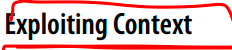

In [18]:
def pos_features(sentence, i): 
    features = {
                "suffix(1)": sentence[i][-1:],
                "suffix(2)": sentence[i][-2:],
                "suffix(3)": sentence[i][-3:]
                }
    if i == 0:
        features["prev-word"] = "<START>"
    else:
        features["prev-word"] = sentence[i-1]
    return features


pos_features(brown.sents()[0], 8)

{'suffix(1)': 'n', 'suffix(2)': 'on', 'suffix(3)': 'ion', 'prev-word': 'an'}

In [19]:
tagged_sents = brown.tagged_sents(categories='news')

featuresets = []
for tagged_sent in tagged_sents:
    untagged_sent = nltk.tag.untag(tagged_sent)
    for i, (word, tag) in enumerate(tagged_sent):
        featuresets.append( (pos_features(untagged_sent, i), tag) )

In [20]:
size = int(len(featuresets) * 0.1)
rain_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)



In [21]:
nltk.classify.accuracy(classifier, test_set)

0.14221780208851317

In [29]:
classifier.classify(pos_features('cats are eating'.split(),2))

'NN'

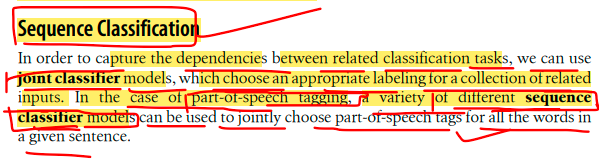

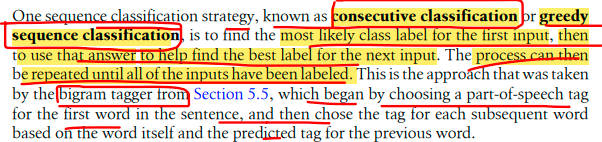

In [30]:
def pos_features(sentence, i, history): 
    features = {
                "suffix(1)": sentence[i][-1:],
                "suffix(2)": sentence[i][-2:],
                "suffix(3)": sentence[i][-3:]
            }
    if i == 0:
        features["prev-word"] = "<START>"
        features["prev-tag"] = "<START>"
    else:
        features["prev-word"] = sentence[i-1]
        features["prev-tag"] = history[i-1]
    return features


In [36]:
class ConsecutivePosTagger(nltk.TaggerI): 
    def __init__(self, train_sents):
        train_set = []
        
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
        
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = pos_features(untagged_sent, i, history)
                train_set.append( (featureset, tag) )
                history.append(tag)
        
        self.classifier = nltk.NaiveBayesClassifier.train(train_set)
    
    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = pos_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)



In [37]:
tagged_sents = brown.tagged_sents(categories='news')
size = int(len(tagged_sents) * 0.1)
train_sents, test_sents = tagged_sents[size:], tagged_sents[:size]
tagger = ConsecutivePosTagger(train_sents)


print (tagger.accuracy(test_sents))

0.7980528511821975


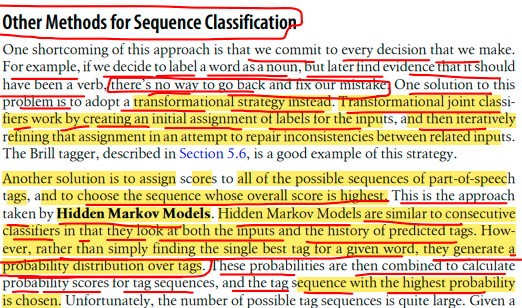

# _____________________________________________________________________________
# Identifying Dialogue Act Types

In [54]:
import nltk
posts = nltk.corpus.nps_chat.xml_posts()[:10000]



def dialogue_act_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains(%s)' % word.lower()] = True
    features['length'] = len(post)
    return features

In [55]:
posts[0].text,posts[0].get('class'),dialogue_act_features(posts[0].text)

('now im left with this gay name',
 'Statement',
 {'contains(now)': True,
  'contains(im)': True,
  'contains(left)': True,
  'contains(with)': True,
  'contains(this)': True,
  'contains(gay)': True,
  'contains(name)': True,
  'length': 30})

In [56]:
featuresets = [(dialogue_act_features(post.text), post.get('class')) for post in posts]
size = int(len(featuresets) * 0.1)

train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)


In [57]:
print (nltk.classify.accuracy(classifier, test_set))

0.661


# Recognizing Textual Entailment

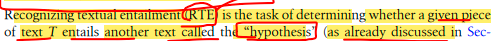

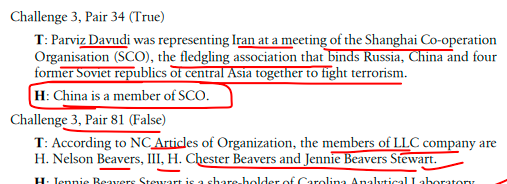

In [62]:
nltk.download('rte')

[nltk_data] Downloading package rte to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\rte.zip.


True

In [63]:
def rte_features(rtepair):
    extractor = nltk.RTEFeatureExtractor(rtepair)
    features = {}
    features['word_overlap'] = len(extractor.overlap('word')) # overlap of words between the text and the hypothesis
    features['word_hyp_extra'] = len(extractor.hyp_extra('word')) # degree to which there are words in the hypothesis but not in the text 
    features['ne_overlap'] = len(extractor.overlap('ne')) # overlap of named entities (NEs) between the text and the hypothesis
    features['ne_hyp_extra'] = len(extractor.hyp_extra('ne'))
    return features


rtepair = nltk.corpus.rte.pairs(['rte3_dev.xml'])[33]
extractor = nltk.RTEFeatureExtractor(rtepair)
print (extractor.text_words)

{'Asia', 'Soviet', 'four', 'binds', 'republics', 'fledgling', 'former', 'operation', 'China', 'Parviz', 'Iran', 'Co', 'at', 'Davudi', 'Russia', 'was', 'fight', 'association', 'central', 'together', 'representing', 'SCO', 'Shanghai', 'Organisation', 'meeting', 'terrorism.', 'that'}


In [73]:
print(extractor.hyp_words)

{'China', 'member', 'SCO.'}


In [74]:
print(extractor.overlap('word'))

set()


In [75]:
print(extractor.overlap('ne'))

{'China'}


In [76]:
print( extractor.hyp_extra('word'))

{'member'}


These features indicate that all important words in the hypothesis are contained in the
text, and thus there is some evidence for labeling this as True

In [118]:
import random
import nltk
from nltk.corpus import brown
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy as nltk_accuracy

# Function to convert tagged sentences into feature sets
def pos_features(sentence):
    return {word: tag for word, tag in sentence}

# Function to create feature sets for classification
def create_feature_set(tagged_sents):
    feature_sets = []
    for sentence in tagged_sents:
        features = pos_features(sentence)
        label = sentence[0][1]  # Use the POS tag of the first word as the label
        feature_sets.append((features, label))
    return feature_sets



In [119]:
# Load and shuffle the Brown Corpus tagged sentences
tagged_sents = list(brown.tagged_sents(categories='news'))
random.shuffle(tagged_sents)

# Split the data into training and testing sets
size = int(len(tagged_sents) * 0.1)
train_sents, test_sents = tagged_sents[size:], tagged_sents[:size]

# Convert the tagged sentences to feature sets
train_set = create_feature_set(train_sents)
test_set = create_feature_set(test_sents)

In [122]:
train_set[2]

({'Moritz': 'NP',
  'came': 'VBD',
  'to': 'IN',
  'Texas': 'NP',
  'in': 'IN',
  '1954': 'CD',
  'but': 'CC',
  'his': 'PP$',
  'freshman': 'NN',
  'football': 'NN',
  'efforts': 'NNS',
  'were': 'BED',
  'hampered': 'VBN',
  'by': 'IN',
  'a': 'AT',
  'knee': 'NN',
  'injury': 'NN',
  '.': '.'},
 'NP')

In [123]:
# Train a Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_set)

In [124]:

# Evaluate the classifier
accuracy = nltk_accuracy(classifier, test_set)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.01


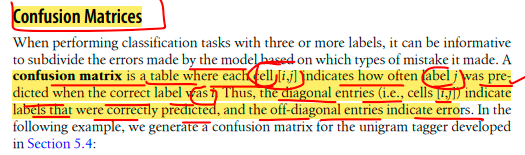

# <h1> <h1 style="color:yellow">Decision Trees</h1> </h1>

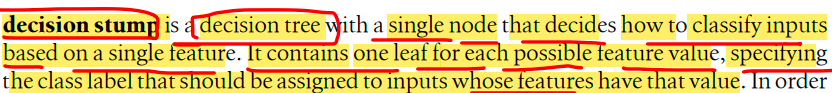

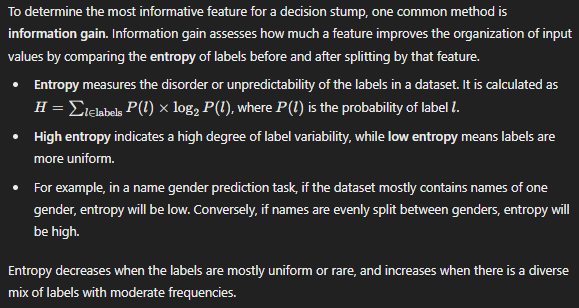

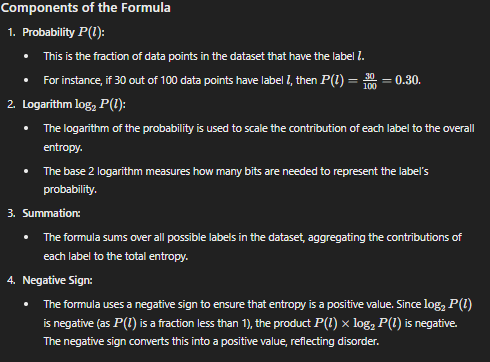

In [146]:
import math


def getentropy(prob) : return -sum([ i * math.log2(i) for i in prob])

prob = [.60,.080,.20,.10,.020]  # 1.643143403943405

prob = [.2,.2,.2,.1,.1,.1,.1]  # 2.721928094887362

prob = [.1,.1,.1,.1,.1,.5]  # 2.1609640474436813

prob = [.02,.02,.02,.02,.02,.9]  # 0.7011884030780173
getentropy(prob)

0.7011884030780173

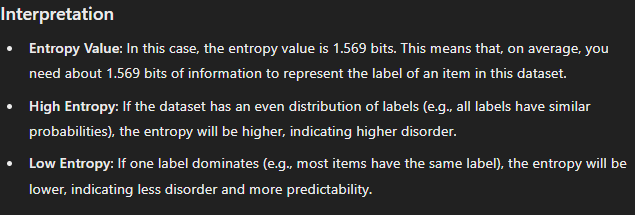

In [156]:
import math
def entropy(labels):
    freqdist = nltk.FreqDist(labels)
    probs = [freqdist.freq(l) for l in nltk.FreqDist(labels)]
    return -sum([p * math.log(p,2) for p in probs])


print(entropy(['male', 'male', 'male', 'male'])) # 0.0

print(entropy(['female', 'male', 'female', 'male'])) # 1.0

print(entropy(['female', 'female', 'male', 'female'])) # 0.8112781244591328

-0.0
1.0
0.8112781244591328


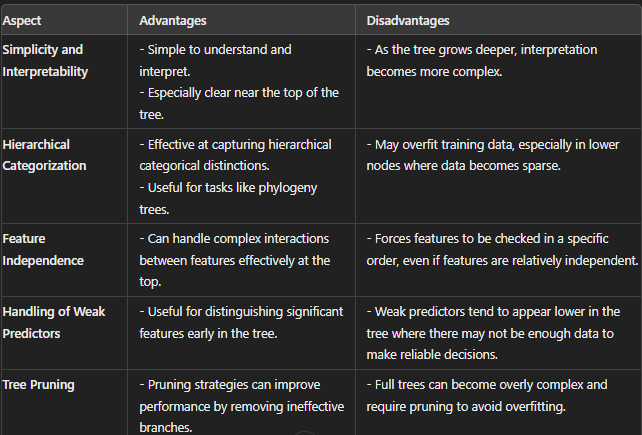

# <span style="color:yellow"> Naive Bayes Classifiers </span>

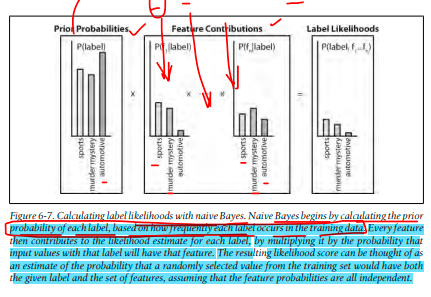

# __________________________________________________________________________________
<span style="color:yellow"> The Naive Bayes classifier works by assuming that each
 feature of the input is generated independently of the others,
 given a class label. Essentially, it chooses the most likely label for an input
  by first assuming that the label is selected, and then each feature is generated independently from the label. While this assumption of independence is unrealistic because features are often related to each other, it simplifies the calculation and allows for effective classification in many cases. This assumption is known as the "naive Bayes assumption" or the "independence assumption." </span>
# __________________________________________________________________________________


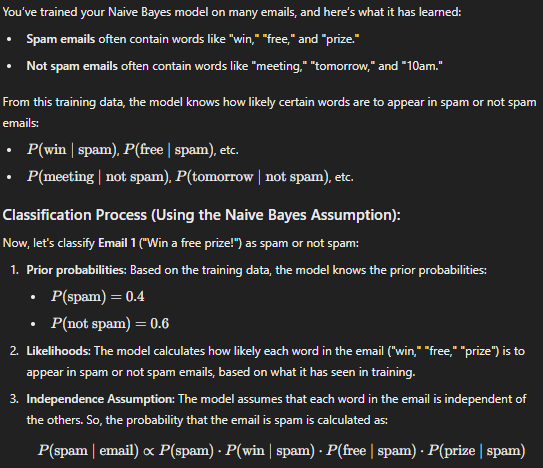

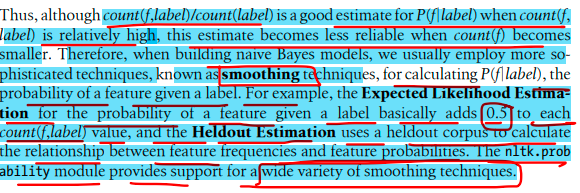
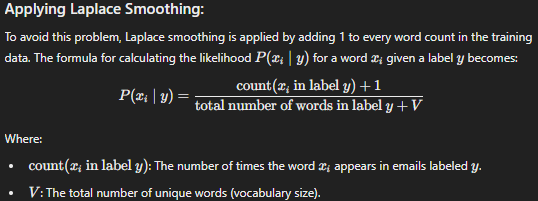
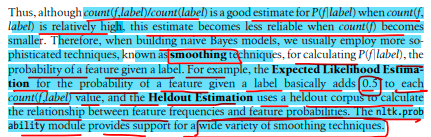

# DATAPREPROCESS

In [ ]:
import nltk
from nltk.corpus import movie_reviews
import random
from nltk import FreqDist

nltk.download('movie_reviews')

# Load movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle documents
random.shuffle(documents)

# Extract features (words)
all_words = FreqDist(word.lower() for word in movie_reviews.words())
word_features = list(all_words.keys())[:2000]



In [9]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[f'contains({word})'] = (word in document_words)
    return features

# Create feature sets
feature_sets = [(document_features(d), c) for (d, c) in documents]

# Split data into training and testing sets
train_set, test_set = feature_sets[:1500], feature_sets[1500:]

# WITH SMOOTHING 

NLTK BY DEFAULT INCLUDES SMOOTHING FEATURE THOUGH

In [37]:
from collections import defaultdict
import math

class NaiveBayesClassifierWithSmoothing:
    def __init__(self, train_set):
        self.train_set = train_set
        self.labels = set(label for (_, label) in train_set)
        self.feature_probs = defaultdict(lambda: defaultdict(lambda: 0))
        self.label_probs = defaultdict(lambda: 0)
        self.vocab_size = len(word_features)
        self._train()

    def _train(self):
        feature_counts = defaultdict(lambda: defaultdict(lambda: 0))
        label_counts = defaultdict(lambda: 0)

        for features, label in self.train_set:
            label_counts[label] += 1
            for feature, value in features.items():
                if value:  # if feature is True (present)
                    feature_counts[label][feature] += 1

        total_examples = len(self.train_set)
        
        # Calculate label probabilities
        for label in label_counts:
            self.label_probs[label] = label_counts[label] / total_examples
        
        # Calculate feature probabilities with Laplace smoothing
        for label in feature_counts:
            total_features_in_label = sum(feature_counts[label].values())
            for feature in word_features:
                # Add 1 for Laplace smoothing
                self.feature_probs[label][f'contains({feature})'] = (
                    (feature_counts[label][f'contains({feature})'] + 1) / (total_features_in_label + self.vocab_size)
                )

    def classify(self, features):
        # Calculate posterior probabilities
        label_scores = {}
        for label in self.labels:
            log_prob = math.log(self.label_probs[label])  # Use log to avoid underflow
            for feature, value in features.items():
                if value:  # If feature is True
                    log_prob += math.log(self.feature_probs[label][feature])
            label_scores[label] = log_prob

        return max(label_scores, key=label_scores.get)

    def accuracy(self, test_set):
        correct = 0
        for features, label in test_set:
            prediction = self.classify(features)
            if prediction == label:
                correct += 1
        return correct / len(test_set)


In [38]:
classifier_with_smoothing = NaiveBayesClassifierWithSmoothing(train_set)

# Test accuracy
print(f"Accuracy with Laplace smoothing: {classifier_with_smoothing.accuracy(test_set) * 100:.2f}%")

Accuracy with Laplace smoothing: 80.60%


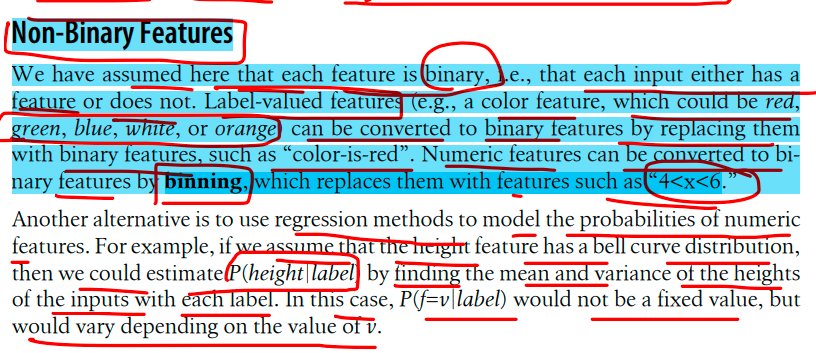

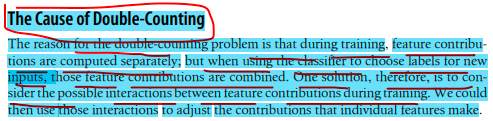 

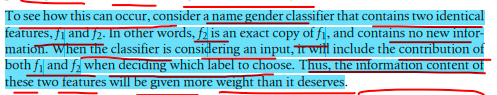



#  Maximum Entropy Classifiers

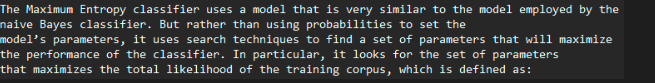

# ___________________________________________________________________________________________
Here we only consider a feature if it has come under a label certain amount of time 

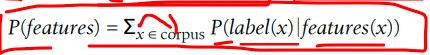

# _________________________________________________________________________________________________________________

Here how many time the feature comes with A label / how many times it came with all labels

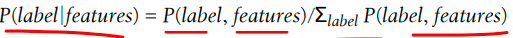

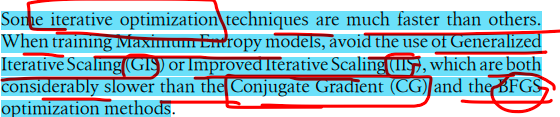

In [1]:
import nltk
from nltk.corpus import movie_reviews
import random
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Download the dataset if not already downloaded
nltk.download('movie_reviews')

# Load the dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents to ensure randomness
random.shuffle(documents)

# Split the documents into texts (joined words) and labels (categories)
texts = [' '.join(words) for words, _ in documents]
labels = [category for _, category in documents]

# Split data into training and testing sets
train_texts, test_texts = texts[:1500], texts[1500:]
train_labels, test_labels = labels[:1500], labels[1500:]

# Vectorize the text data using a bag-of-words model (2000 most common words)
vectorizer = CountVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Convert labels into a binary format (1 for "pos", 0 for "neg")
y_train = np.array([1 if label == 'pos' else 0 for label in train_labels])
y_test = np.array([1 if label == 'pos' else 0 for label in test_labels])


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


# --- Logistic Regression with Conjugate Gradient (CG) ---


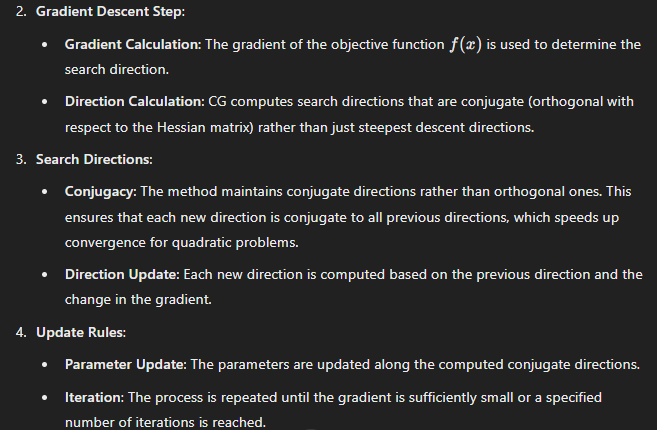

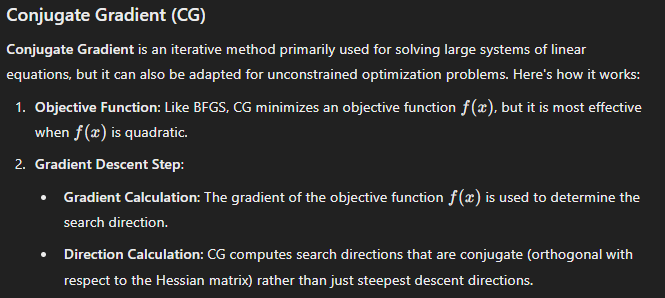

In [2]:
model_cg = LogisticRegression(solver='newton-cg', max_iter=1000)
model_cg.fit(X_train, y_train)
pred_cg = model_cg.predict(X_test)
accuracy_cg = accuracy_score(y_test, pred_cg)
print(f"Accuracy with Conjugate Gradient (CG): {accuracy_cg * 100:.2f}%")

Accuracy with Conjugate Gradient (CG): 80.00%


# --- Logistic Regression with BFGS ---


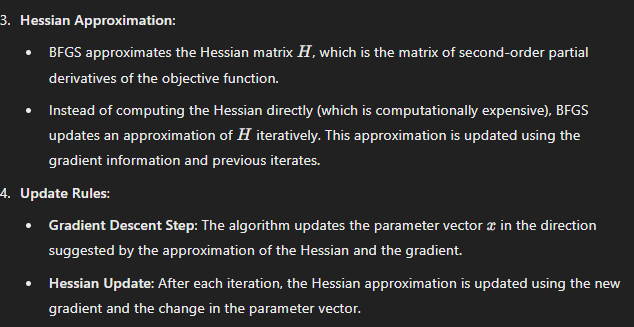

In [2]:

model_bfgs = LogisticRegression(solver='lbfgs', max_iter=1000)
model_bfgs.fit(X_train, y_train)
pred_bfgs = model_bfgs.predict(X_test)
accuracy_bfgs = accuracy_score(y_test, pred_bfgs)
print(f"Accuracy with BFGS: {accuracy_bfgs * 100:.2f}%")

Accuracy with BFGS: 81.20%


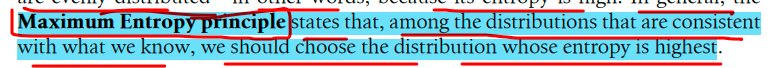

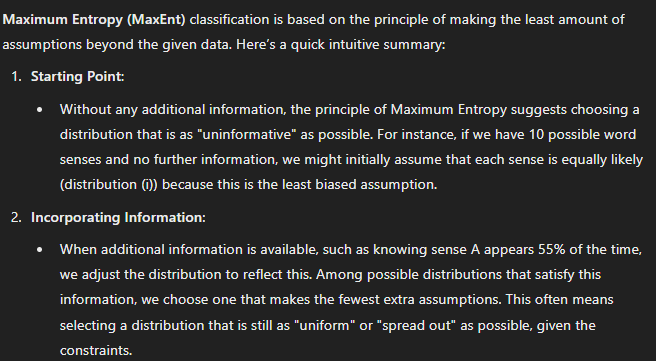

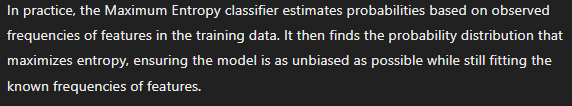

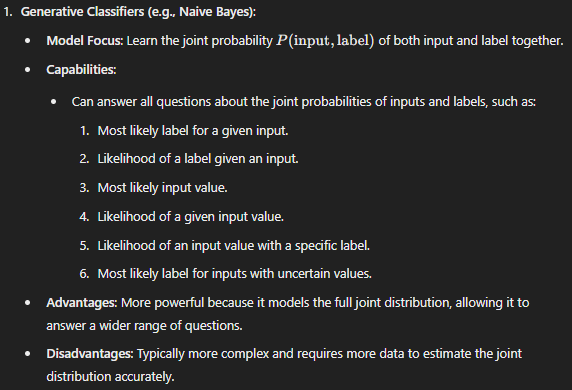

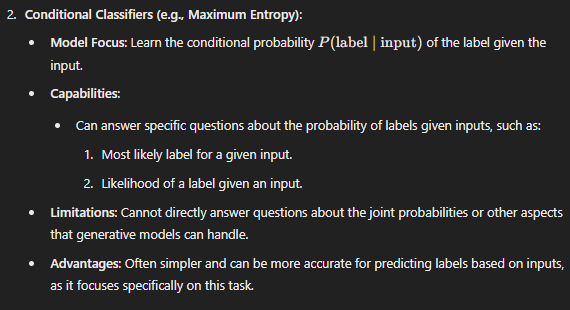
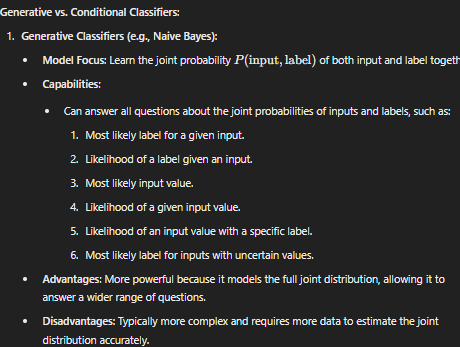